<a href="https://colab.research.google.com/github/huanfachen/DSSS/blob/main/Week_4/Practical_04_Part2_Keras_Yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="float:left">
    <h1 style="width:600px">CASA Practical 4 Part 2: Neural networks using Keras and Yolo</h1>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Introduction
In this practical, we will first use [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

Then, we will extends these principles to conduct object detection in satellite imagery, using pre-trained deep learning models YOLOv5.

## Setting up Google Colab

As installing and configuring tensorflow and YOLO on local machines is a pain, we recommend using Google Colab for this practical. Click [here](https://colab.research.google.com/github/huanfachen/DSSS/blob/main/Week_4/Practical_04_Part2_Keras_Yolov5.ipynb) to run this practical on Google Colab, which requires a Google account.

Resource limit of Google Colab under free plan:

- Memory: up to 12 GB.
- Maximum duration of running a notebook: notebooks can run for at most **12 hours**, depending on availability and your usage patterns. (The notebook will die after at most 12 hours)
- GPU duration: dynamic, up to a few hours. If you use GPU regularly, runtime durations will become shorter and shorter and disconnections more frequent.

*Very Important* - we will use the GPU on Google Colab to accelerate the model training. To do this, go to 'Runtime' -> 'Change runtime type' -> Select 'T4 GPU' -> Save. See below.

![](https://github.com/huanfachen/DSSS/blob/main/Figures/Colab_GPU_setting.jpg?raw=true)

If you are following along in your own development environment, rather than Colab, see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment.

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#print("TensorFlow version:", tf.__version__)

C:\Users\dune\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

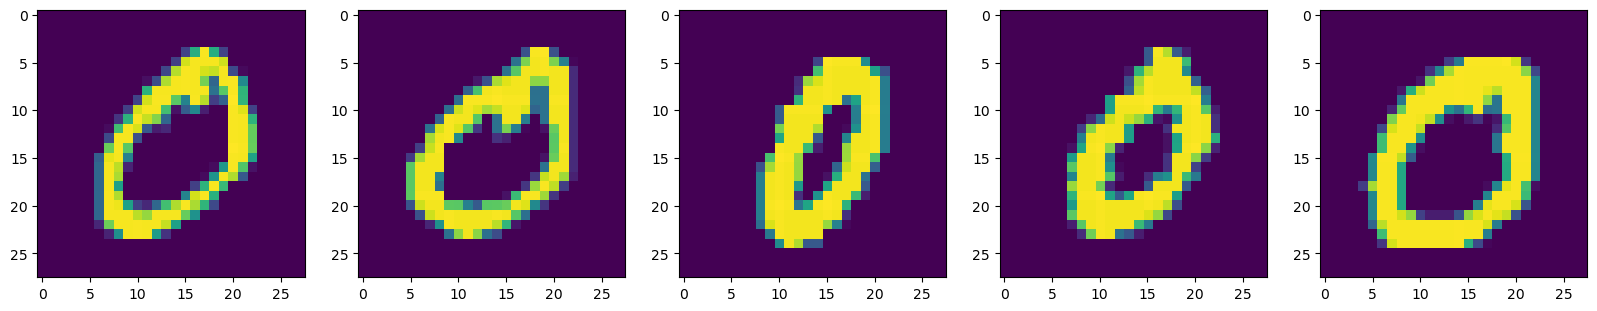

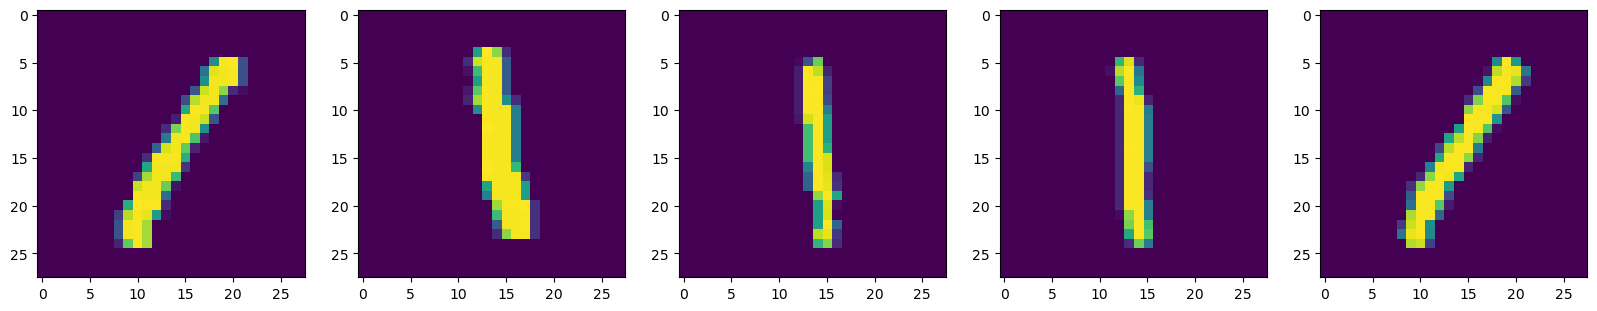

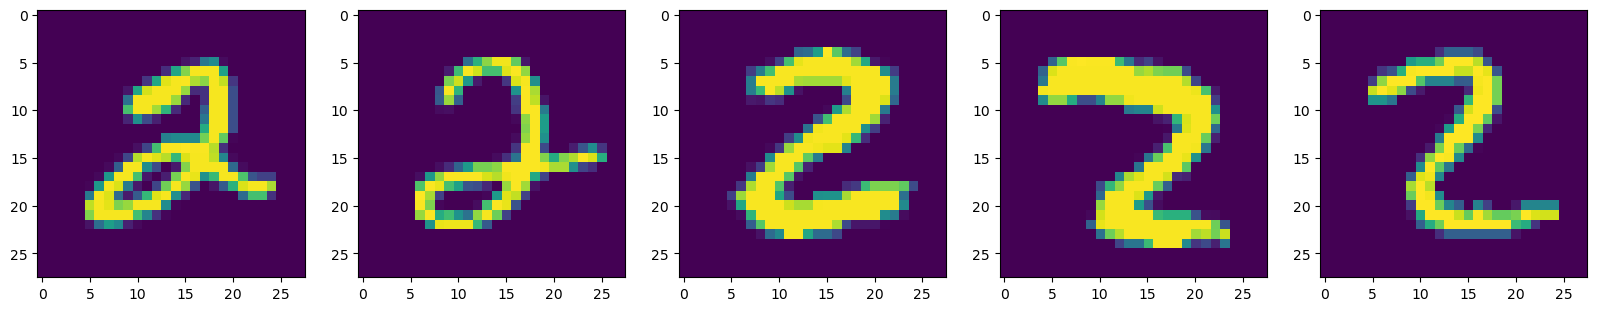

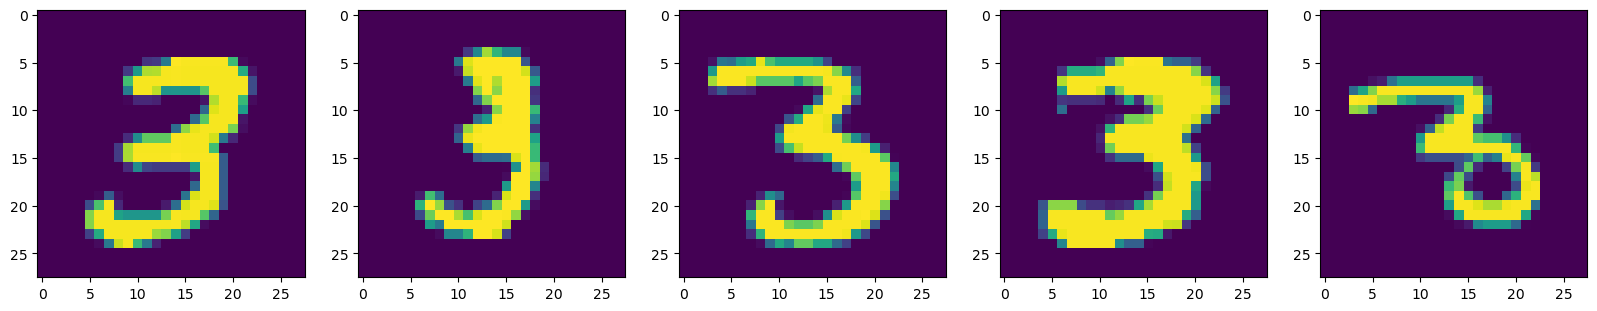

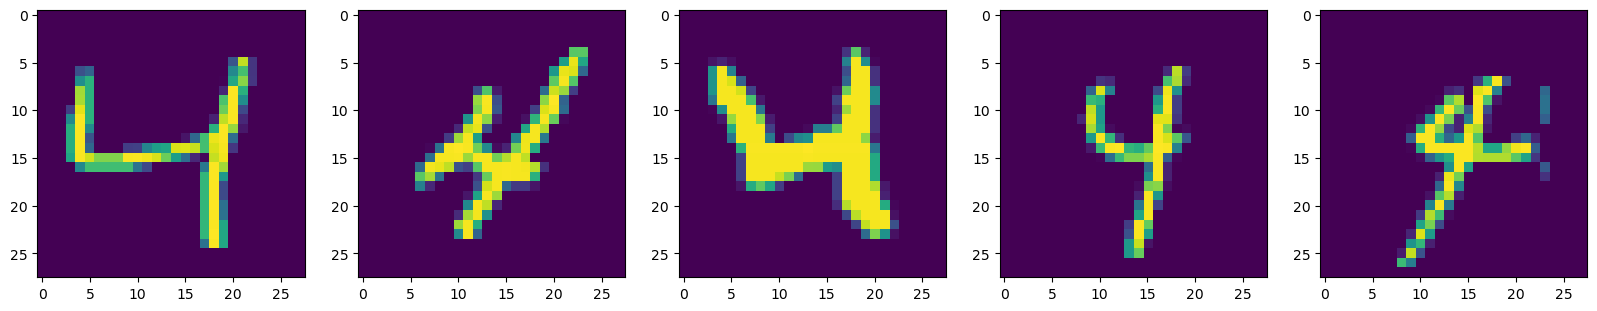

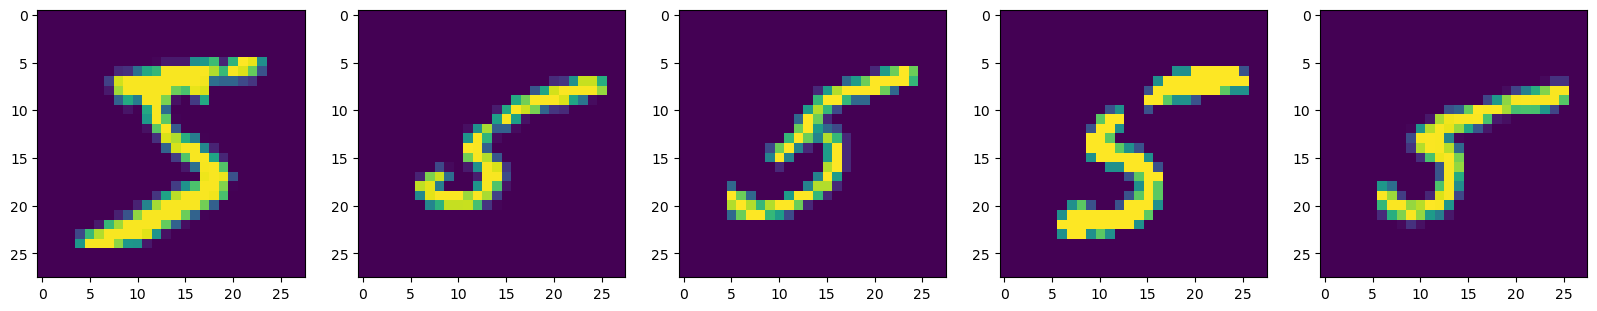

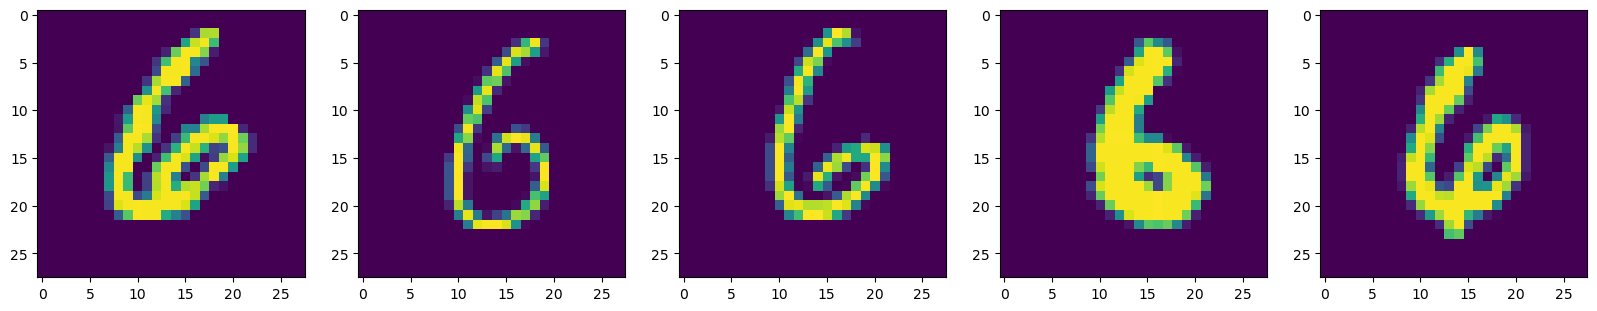

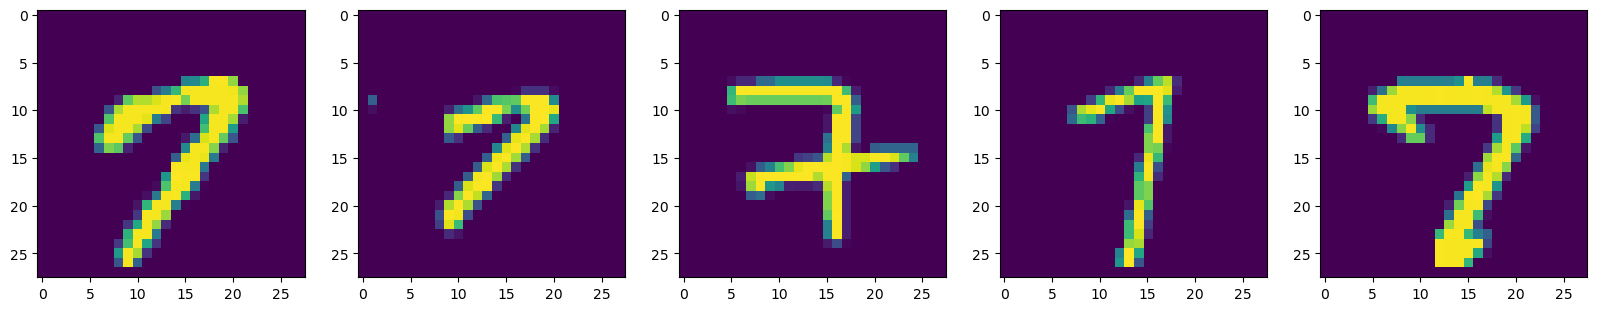

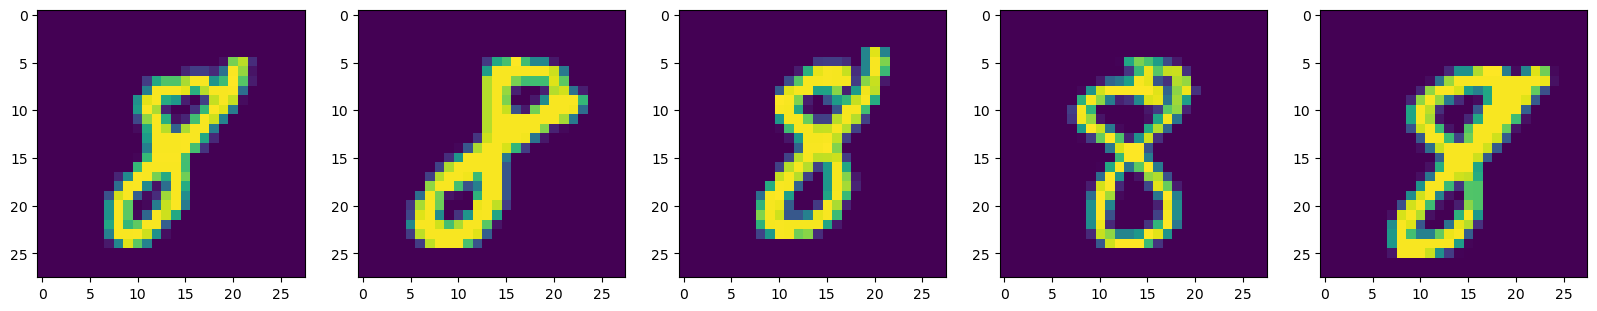

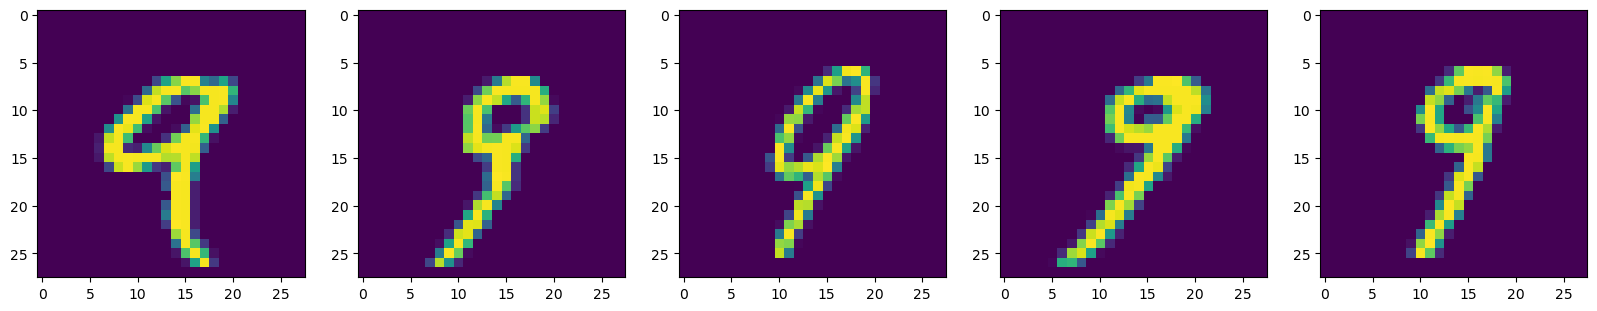

In [3]:

def plot_num(number):

  item_index = np.where(y_train[:1000]==number)
  subset=x_train[item_index]

  egs=5
  fig, axs = plt.subplots(1,egs, figsize=(20,10))

  for i in range(0,egs):
    axs[i].imshow(subset[i])


for x in range(0,10):
  plot_num(x)

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.34372714, -0.11252979, -0.18577415,  0.91312075, -0.13537747,
        -0.41513225, -0.17821461, -0.02189657, -0.65574944,  1.1804796 ]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.05885334, 0.07416156, 0.06892381, 0.20682986, 0.07248634,
        0.05479744, 0.06944681, 0.08119707, 0.0430786 , 0.27022514]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [8]:
loss_fn(y_train[:1], predictions).numpy()

2.9041119

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [10]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2977 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1428 - accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1075 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0865 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0743 - accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0650 - accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0575 - accuracy: 0.9812
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9834
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0495 - accuracy: 0.9841
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [11]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0650 - accuracy: 0.9815 - 528ms/epoch - 2ms/step


[0.06504518538713455, 0.9815000295639038]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

313/313 [==============================] - 0s 1ms/step
9


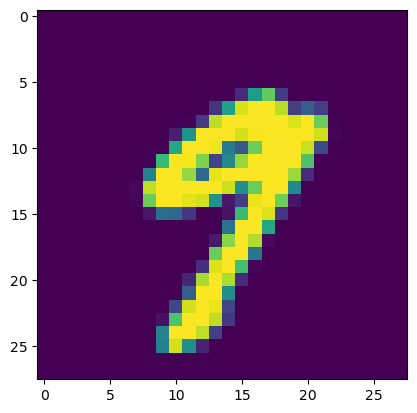

In [13]:
#probability_model(x_test[:1])
predictions=probability_model.predict(x_test)

index=20

print(np.argmax(predictions[index]))
plt.imshow(x_test[index])

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


# YOLOv5 for Object Detection in Satellite Imagery

Having explored some of the basic principles of deep learning, we're now ready to apply this to a more explicitly spatial use case: object detection in satellite imagery.

Read the [following guide](https://bellingcat.github.io/RS4OSINT/C5_Object_Detection.html), and then complete the rest of this workbook.

## What is YOLOv5
Object detection is a fairly complicated task, and there are a number of different approaches to it. In this tutorial, we’ll be using a model called YOLOv5. YOLO stands for **You Only Look Once**, and it’s a model that was developed by [Joseph Redmon et al.](https://pjreddie.com/), and the full paper detailing the model can be found [here](https://arxiv.org/abs/1506.02640).

The YOLOv5 model is a convolutional neural network (CNN), which is a type of deep learning model. CNNs are very good at identifying patterns in images, particularly in small regions of images. This is important for object detection, because we want to be able to identify objects even if they’re partially obscured by other objects.

YOLO works by chopping an image up into a grid, and then predicting the location and size of objects in each grid cell:

![](https://bellingcat.github.io/RS4OSINT/images/yolo.jpg)

It learns the locations of these objects by training on a dataset of images in which each object is indicated by a bounding box. Then, when it’s shown a new image, it will attempt to predict bounding boxes around the objects in that image. The standard YOLO model is trained on the COCO dataset, which contains over 200,000 images of 80 different objects ranging from people to cars to dogs. YOLO models pre-trained on this dataset work great out of the box to detect objects in videos, photographs, and live streams. But the nature of the objects we’re interested in is a bit different.

Luckily, we can simply **re-train** the YOLOv5 model on datasets of labeled satellite imagery. We will walk through the process of re-training YOLOv5 on a custom dataset, and then using it to identify objects in satellite imagery pulled from Google Earth Engine or Google Map.

In [14]:
!git clone https://github.com/huanfachen/yolov5_RS  # clone repo
#%cd yolov5_RS
%pip install -qr yolov5_RS/requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.
Setup complete. Using torch 2.1.2+cpu (CPU)


We will use public satellite imagery dataset from Roboflow, specifically, [this link](https://universe.roboflow.com/gdit/aerial-airport/dataset/1).

What is Roboflow? It is a Computer Vision developer framework for better data collection to preprocessing and model training techniques. Roboflow contains public datasets readily available to users and also has access for users to upload their own custom data.

You can explore a gallery of public datasets on [Roboflow Universe](https://universe.roboflow.com/). These datasets are frequently updated.

Note that you need a Roboflow API KEY to access the datasets. To get your own API KEY, visit [this link](https://docs.roboflow.com/api-reference/authentication).

Below is my API KEY in the free tier, which is subject to certain use limit. You can use it for tests, but it might be slow or out of limit. It is always a good idea to get your own API KEY and get control of it.

In [15]:
from roboflow import Roboflow
API_KEY = 'aywzIBJkeuu2TcHztYSq'
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("gdit").project("aerial-airport")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aerial-Airport-1 in yolov5pytorch:: 100%|██████████| 1632/1632 [00:00<00:00, 2896.59it/s]


Check the datasets have been downloaded.

In [16]:
!ls
!ls yolov5_RS

'ls' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


'ls' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


The next step is to copy the data folder *Aerial-Airport-1* into the folder of yolov5_RS, as the YOLOv5 Python codes require the datasets are in the same folder.

In [17]:
!cp -r Aerial-Airport-1 yolov5_RS

'cp' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [18]:
!ls
!ls yolov5_RS

'ls' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'ls' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


We will train the model via running the *train.py* file.

The settings, including batch size, is important. The general rule is: the larger batch size, the larger memory required. The batch size is set as 16 here after trial and error. If we set **--batch 32**, Colab might run out of memory and force the training to stop (*setting a '^C' in the proccess*). Note that the memory of Google Colab is default at 12 GB of RAM.

Other factors influencing the required memory of YOLO include image size, batch size, and model size.

See [Discussion on Github](https://github.com/ultralytics/yolov5/issues/3847) or [Stackoverflow](https://stackoverflow.com/a/63797661/4667568).

The following model training takes quite a long time, around 3 hours.

In [19]:
!less yolov5_RS/train.py

'less' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [20]:
%%time
!python yolov5_RS/train.py --data {dataset.location}/data.yaml --img 320 --batch 16 --cache

python: can't open file 'd:\\CASApre\\DSSS\\Week_4\\yolov5_RS\\train.py': [Errno 2] No such file or directory


CPU times: total: 0 ns
Wall time: 100 ms


Then, we will apply the YOLOv5 model to detect objects of a remote sensing image from Google Map.

In [21]:
img='gatwick.jpg'
!python yolov5_RS/detect.py --weights yolov5_RS/weights/general.pt --img 2000 --conf 0.4 --source {os.path.join('yolov5_RS',img)} --line-thickness 2 --exist-ok #--hide-labels --exist-ok

python: can't open file 'd:\\CASApre\\DSSS\\Week_4\\yolov5_RS\\detect.py': [Errno 2] No such file or directory


The results of detected objects are saved in the runs/detect/exp folder, as below.

In [22]:
!ls yolov5_RS/runs/detect/exp

'ls' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [23]:
img='gatwick.jpg'

In [24]:
out_dir='yolov5_RS/runs/detect/exp'
Image(filename=os.path.join(out_dir,img))

FileNotFoundError: [Errno 2] No such file or directory: 'yolov5_RS/runs/detect/exp\\gatwick.jpg'